# Proteotyping of pure bacterial cultures
Pure cultures of four species of bacteria: *Escherichia coli*, *Pseudomonas aeruginosa*, *Staphyoloccus aureus*, *Streptococcus pneumoniae*. Each species was cultured in three identical replicates and run through the following workflow steps:

 1. Cell culture
 2. Proteomics prep
 3. Tandem MS
 4. ReAdW raw to mzXML conversion
 5. X!Tandem peptide search
 6. BLAT alignments of peptides to translated genome sequences
 7. TCUP

The following samples were used:

    QE_150508_32	 	S. pneumoniae
    QE_150508_35	 	S. pneumoniae
    QE_150508_38	 	S. pneumoniae
    QE_150611_128		S. aureus
    QE_150611_131		S. aureus
    QE_150611_137		S. aureus
    QE_150611_140		E. coli
    QE_150611_143		E. coli
    QE_150611_146		E. coli
    QE_150611_152		P. aeruginosa
    QE_150611_155		P. aeruginosa
    QE_150611_158		P. aeruginosa
    QE_150611_161		P. aeruginosa, E. coli, S. aureus, S. pneumoniae, 1:1:1:1 mixture
    QE_150611_164		P. aeruginosa, E. coli, S. aureus, S. pneumoniae, 1:1:1:1 mixture
    QE_150611_169		P. aeruginosa, E. coli, S. aureus, S. pneumoniae, 1:1:1:1 mixture

In [52]:
# Import all required libraries
import matplotlib as mpl, matplotlib
matplotlib.use("Agg")
%matplotlib inline
from pylab import *
import numpy as np
import pandas as pd
from scipy.stats import sem
from os import listdir, path

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

C:\Users\Fredrik\Anaconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Pure bacterial cultures
Data from the analysis of bacterial cultures were manually entered into the next cell of the notebook.
The data are from the following runs:

    QE_150508_{32,35,38}     S. pneumoniae
    QE_150611_{128,131,137}  S. aureus
    QE_150611_{140,143,146}  E. coli
    QE_150611_{152,155,157}  P. aeruginosa

In [53]:
species = pd.Series(["E. coli", "E. coli", "E. coli", 
                     "P. aeruginosa", "P. aeruginosa", "P. aeruginosa", 
                     "S. aureus", "S. aureus", "S. aureus", 
                     "S. pneumoniae", "S. pneumoniae", "S. pneumoniae"],
                   name="Species")
numspectra = pd.Series([3490, 4830, 4925,
                        4450, 3048, 5192,
                        3973, 3533, 4103, 
                        5333, 5193, 4754], 
                       name="Number of spectra")
discriminative_peptides = pd.Series([150, 217, 222,
                                     693, 372, 938,
                                     320, 227, 362,
                                     279, 268, 263], 
                                     name="Discriminative peptides")
correct_assignments = pd.Series([125, 177, 195,
                                 662, 353, 881, 
                                 310, 221, 353,
                                 263, 255, 235], 
                                name="Correct assignments")
TPR = pd.Series(correct_assignments / discriminative_peptides, name="True positive rate (TPR)")
raw_data = pd.DataFrame([species, numspectra, discriminative_peptides, correct_assignments, TPR]).transpose()
print(raw_data)

          Species Number of spectra Discriminative peptides Correct assignments True positive rate (TPR)
0         E. coli              3490                     150                 125                 0.833333
1         E. coli              4830                     217                 177                 0.815668
2         E. coli              4925                     222                 195                 0.878378
3   P. aeruginosa              4450                     693                 662                 0.955267
4   P. aeruginosa              3048                     372                 353                 0.948925
5   P. aeruginosa              5192                     938                 881                 0.939232
6       S. aureus              3973                     320                 310                  0.96875
7       S. aureus              3533                     227                 221                 0.973568
8       S. aureus              4103                    

In [54]:
print("Means")
print(raw_data.groupby("Species").aggregate(lambda x: np.mean(x)))
print("Standard deviations")
print(raw_data.groupby("Species").aggregate(lambda x: np.std(x)))
print("Overall maximum:", np.max(raw_data["Number of spectra"]))
print("Overall minimum:", np.min(raw_data["Number of spectra"]))

Means
               Number of spectra  Discriminative peptides  Correct assignments  True positive rate (TPR)
Species                                                                                                 
E. coli              4415.000000               196.333333           165.666667                  0.842460
P. aeruginosa        4230.000000               667.666667           632.000000                  0.947808
S. aureus            3869.666667               303.000000           294.666667                  0.972485
S. pneumoniae        5093.333333               270.000000           251.000000                  0.929227
Standard deviations
               Number of spectra  Discriminative peptides  Correct assignments  True positive rate (TPR)
Species                                                                                                 
E. coli               655.222608                32.826141            29.679772                  0.026402
P. aeruginosa         889.000

## Pure bacterial samples barchart
Plot a barchart of the average sensitivity for each species, along with standard error bars (SEM) to indicate the variability of the results.

In [55]:
means_sems = raw_data.groupby("Species")["True positive rate (TPR)"].aggregate([lambda x: np.mean(x), sem])
print(means_sems)
names = means_sems.index
means = means_sems["<lambda>"]
sems = means_sems["sem"]

               <lambda>       sem
Species                          
E. coli        0.842460  0.018669
P. aeruginosa  0.947808  0.004662
S. aureus      0.972485  0.001922
S. pneumoniae  0.929227  0.018027


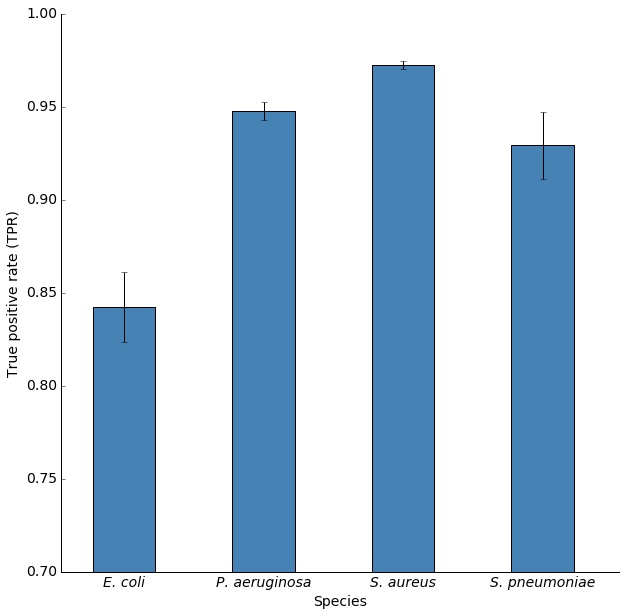

In [56]:
font = {"family": "sans",
        "weight": "normal",
        "size": 14}
mpl.rc("font", **font)

indices = np.arange(0, len(means_sems))
width = 0.45

fig, ax = plt.subplots()
rects = ax.bar(indices, means, width, yerr=sems, color="steelblue", error_kw=dict(ecolor="black"))
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("left")

# Adjust plot area, set tick labels
ylim([0.7, 1])
xlim([-width/2, len(names)-width/2])
xlabel("Species")
ylabel("True positive rate (TPR)")
ax.set_xticks(indices + width/2)
ax.set_xticklabels(names, style="italic")

# Adjust figure size, save figures
fig.set_figheight(10)
fig.set_figwidth(10)
plt.savefig("real_cultures_tpr.png")
plt.savefig("real_cultures_tpr.pdf")

# Mixed bacterial cultures
Mixed samples with equal ratio of all four species (1:1:1:1), the data are from the following runs:

    QE_150611_161
    QE_150611_164
    QE_150611_169

In [57]:
# Raw data for mixed samples
species = pd.Series(["E. coli", "E. coli", "E. coli", 
                     "P. aeruginosa", "P. aeruginosa", "P. aeruginosa", 
                     "S. aureus", "S. aureus", "S. aureus", 
                     "S. pneumoniae", "S. pneumoniae", "S. pneumoniae"],
                   name="Species")
numspectra_mix = pd.Series([4187, 4911, 4402,
                        4187, 4911, 4402,
                        4187, 4911, 4402,
                        4187, 4911, 4402],
                       name="Number of spectra")
discriminative_fragments = pd.Series([301, 378, 384,
                                      301, 378, 384,
                                      301, 378, 384,
                                      301, 378, 384],
                                     name="Discriminative fragments")
species_assignments = pd.Series([26,  29,  31,
                                 162, 198, 192, 
                                 51, 86, 93,
                                 37,  43,  43], 
                                name="Species assignments")
estimated_abundance = pd.Series(species_assignments / discriminative_fragments, name="Estimated abundance")
mix_data = pd.DataFrame([species, numspectra_mix, discriminative_fragments, species_assignments, estimated_abundance]).transpose()
print(mix_data)

          Species Number of spectra Discriminative fragments Species assignments Estimated abundance
0         E. coli              4187                      301                  26           0.0863787
1         E. coli              4911                      378                  29           0.0767196
2         E. coli              4402                      384                  31           0.0807292
3   P. aeruginosa              4187                      301                 162            0.538206
4   P. aeruginosa              4911                      378                 198             0.52381
5   P. aeruginosa              4402                      384                 192                 0.5
6       S. aureus              4187                      301                  51            0.169435
7       S. aureus              4911                      378                  86            0.227513
8       S. aureus              4402                      384                  93           

In [58]:
print("Means")
print(mix_data.groupby("Species").aggregate(lambda x: np.mean(x)))
print("Standard deviations")
print(mix_data.groupby("Species").aggregate(lambda x: np.std(x)))
print("Overall average spectra:", np.mean(mix_data["Number of spectra"]))
print("Overall average discriminative:", np.mean(mix_data["Discriminative fragments"]))
print("Overall maximum:", np.max(mix_data["Number of spectra"]) )
print("Overall minimum:", np.min(mix_data["Number of spectra"]))

Means
               Number of spectra  Discriminative fragments  Species assignments  Estimated abundance
Species                                                                                             
E. coli                     4500                354.333333            28.666667             0.081276
P. aeruginosa               4500                354.333333           184.000000             0.520672
S. aureus                   4500                354.333333            76.666667             0.213045
S. pneumoniae               4500                354.333333            41.000000             0.116220
Standard deviations
               Number of spectra  Discriminative fragments  Species assignments  Estimated abundance
Species                                                                                             
E. coli               303.586341                 37.791827             2.054805             0.003962
P. aeruginosa         303.586341                 37.791827       

## Adjustment/normalization ratios
The adjustment ratio used to modify the raw estimations of abundance are calculated from the TPR data of the pure bacterial cultures.  

In [59]:
# Compute adjustment ratios based on data from pure samples
adjustment_ratios = {}
for name, group in raw_data.groupby("Species"):
    adjustment_ratios[name] = np.mean(group["Correct assignments"] / group["Number of spectra"])

# Add a column with corrected values for estimated abundance
adjusted_abundance = pd.Series(index=mix_data.index)
for row in mix_data.iterrows():
    adjusted_abundance[row[0]] = row[1]["Estimated abundance"] / adjustment_ratios[row[1]["Species"]]
mix_data.loc[:,'Corrected abundance'] = adjusted_abundance

print("Normalization factors:")
for species, ratio in adjustment_ratios.items():
    print("{:<15} {}".format(species, ratio))
print("Data table")

print(mix_data)

Normalization factors:
E. coli         0.037352163424511885
S. pneumoniae   0.04928406775826628
S. aureus       0.07553811998595412
P. aeruginosa   0.1447539408892252
Data table
          Species Number of spectra Discriminative fragments Species assignments Estimated abundance  Corrected abundance
0         E. coli              4187                      301                  26           0.0863787             2.312550
1         E. coli              4911                      378                  29           0.0767196             2.053953
2         E. coli              4402                      384                  31           0.0807292             2.161298
3   P. aeruginosa              4187                      301                 162            0.538206             3.718075
4   P. aeruginosa              4911                      378                 198             0.52381             3.618620
5   P. aeruginosa              4402                      384                 192          

## Plot mixture and adjusted mixture results
The per species results from the mixed samples are plotted in a bar plot with standard error bars. The adjusted values are plotted alongside the raw per species TPR from the mixed samples to illustrate how adjusting the values improve the results. 

In [60]:
# Reduce estimated abundances for the mixed samples for use in bar plot
mix_means_sems = mix_data.groupby("Species")["Estimated abundance"].aggregate([lambda x: np.mean(x), sem])
print("Mixed samples without correction")
print(mix_means_sems)
mix_names = mix_means_sems.index
mix_means = mix_means_sems["<lambda>"]
mix_sems = mix_means_sems["sem"]

# Reduce corrected abundance estimates for use in bar plot
mix_means_sems_corrected = mix_data.groupby("Species")["Corrected abundance"].aggregate([lambda x: np.mean(x), sem])
print("Mixed samples with correction")
print(mix_means_sems_corrected)
mix_means_corrected = mix_means_sems_corrected["<lambda>"]
mix_sems_corrected = mix_means_sems_corrected["sem"]

# Normalize the corrected abundance estimates for the mixed samples
mix_means_corrected_normalized = mix_means_corrected / sum(mix_means_corrected)
mix_sems_corrected_normalized = mix_sems_corrected / sum(mix_means_corrected) 
print("\nNormalized mixed samples with correction")
print("{:<14} {:>8} {:>8}".format("Species", "Abundance", "SEM"))
for species, v1, v2 in zip(mix_names, mix_means_corrected_normalized, mix_sems_corrected_normalized):
    print("{:<14} {:<1.6f}  {:<1.6f}".format(species, v1, v2))

Mixed samples without correction
               <lambda>       sem
Species                          
E. coli        0.081276  0.002802
P. aeruginosa  0.520672  0.011140
S. aureus      0.213045  0.022213
S. pneumoniae  0.116220  0.003391
Mixed samples with correction
               <lambda>       sem
Species                          
E. coli        2.175934  0.075008
P. aeruginosa  3.596944  0.076959
S. aureus      2.820368  0.294060
S. pneumoniae  2.358161  0.068804

Normalized mixed samples with correction
Species        Abundance      SEM
E. coli        0.198690  0.006849
P. aeruginosa  0.328446  0.007027
S. aureus      0.257535  0.026851
S. pneumoniae  0.215330  0.006283


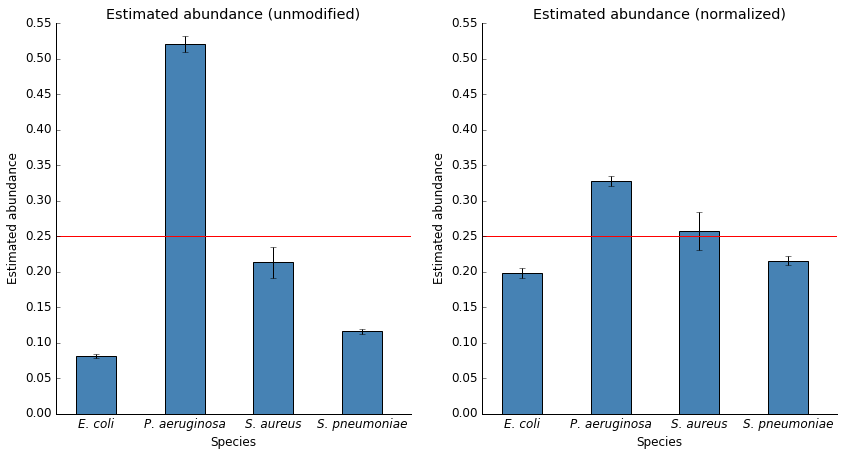

In [61]:
# Adjust bar plot settings
font = {"family": "sans",
        "weight": "normal",
        "size": 12}
mpl.rc("font", **font)
indices = np.arange(0, len(mix_names))
width = 0.45

# Create plot figure with two subplots axes
fig_mix, (ax_mix1, ax_mix2) = plt.subplots(1, 2) #, sharey=True)

# First plot with raw unmodified abundance estimations
rects_mix1 = ax_mix1.bar(indices, 
                         mix_means, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems, 
                         error_kw=dict(ecolor="black"))
ax_mix1.spines["top"].set_color("none")
ax_mix1.spines["right"].set_color("none")
ax_mix1.xaxis.set_ticks_position("none")
ax_mix1.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix1.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix1.set_ylim([0, 0.55])
ax_mix1.set_xlabel("Species")
ax_mix1.set_ylabel("Estimated abundance")
ax_mix1.set_title("Estimated abundance (unmodified)")
ax_mix1.set_xticks(indices + width/2)
ax_mix1.set_xticklabels(mix_names, style="italic")
ax_mix1.set_yticks(np.arange(0, 0.56, 0.05))
# Place expected ratio line
ax_mix1.plot([-.5,4], [0.25,0.25], color="r")

# Second plot with corrected and normalized estimated abundances
rects_mix2 = ax_mix2.bar(indices, 
                         mix_means_corrected_normalized, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized,  
                         error_kw=dict(ecolor="black"))
ax_mix2.spines["top"].set_color("none")
ax_mix2.spines["right"].set_color("none")
ax_mix2.xaxis.set_ticks_position("none")
ax_mix2.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix2.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix2.set_ylim([0, 0.55])
ax_mix2.set_xlabel("Species")
ax_mix2.set_ylabel("Estimated abundance")
ax_mix2.set_title("Estimated abundance (normalized)")
ax_mix2.set_xticks(indices + width/2)
ax_mix2.set_xticklabels(mix_names, style="italic")
ax_mix2.set_yticks(np.arange(0, 0.56, 0.05))
# Place expected ratio line
ax_mix2.plot([-.5,4], [0.25,0.25], color="r")

# Adjust figure size, save figures
fig_mix.set_figheight(7)
fig_mix.set_figwidth(14)
plt.savefig("real_cultures_mix_tpr.png")
plt.savefig("real_cultures_mix_tpr.pdf")

# Supplementary figure normalized with in-silico results
Instead of normalizing with results from pure cultures, normalization factors can be determined from in silico results.

In [62]:
# Add a column with in-silico-corrected values for estimated abundance
insilico_abundance = pd.Series(index=mix_data.index)
insilico_adjustment_ratios = {"E. coli": 0.2704, 
                              "P. aeruginosa": 0.5571, 
                              "S. aureus":  0.5227, 
                              "S. pneumoniae": 0.1788}
for row in mix_data.iterrows():
    insilico_abundance[row[0]] = row[1]["Estimated abundance"] / insilico_adjustment_ratios[row[1]["Species"]]
mix_data.loc[:,'Insilico corrected abundance'] = insilico_abundance


# Reduce corrected abundance estimates for use in bar plot
mix_means_sems_corrected_insilico = mix_data.groupby("Species")["Insilico corrected abundance"].aggregate([lambda x: np.mean(x), sem])
print("Mixed samples with correction")
print(mix_means_sems_corrected_insilico)
mix_means_corrected_insilico = mix_means_sems_corrected_insilico["<lambda>"]
mix_sems_corrected_insilico = mix_means_sems_corrected_insilico["sem"]

# Normalize the corrected abundance estimates for the mixed samples
mix_means_corrected_normalized_insilico = mix_means_corrected_insilico / sum(mix_means_corrected_insilico)
mix_sems_corrected_normalized_insilico = mix_sems_corrected_insilico / sum(mix_means_corrected_insilico) 
print("\nNormalized mixed samples with in silico correction")
print("{:<14} {:>8} {:>8}".format("Species", "Abundance", "SEM"))
for species, v1, v2 in zip(mix_names, mix_means_corrected_normalized_insilico, mix_sems_corrected_normalized_insilico):
    print("{:<14} {:<1.6f}  {:<1.6f}".format(species, v1, v2))

Mixed samples with correction
               <lambda>       sem
Species                          
E. coli        0.300576  0.010361
P. aeruginosa  0.934611  0.019997
S. aureus      0.407586  0.042496
S. pneumoniae  0.649999  0.018965

Normalized mixed samples with in silico correction
Species        Abundance      SEM
E. coli        0.131097  0.004519
P. aeruginosa  0.407634  0.008722
S. aureus      0.177770  0.018535
S. pneumoniae  0.283499  0.008272


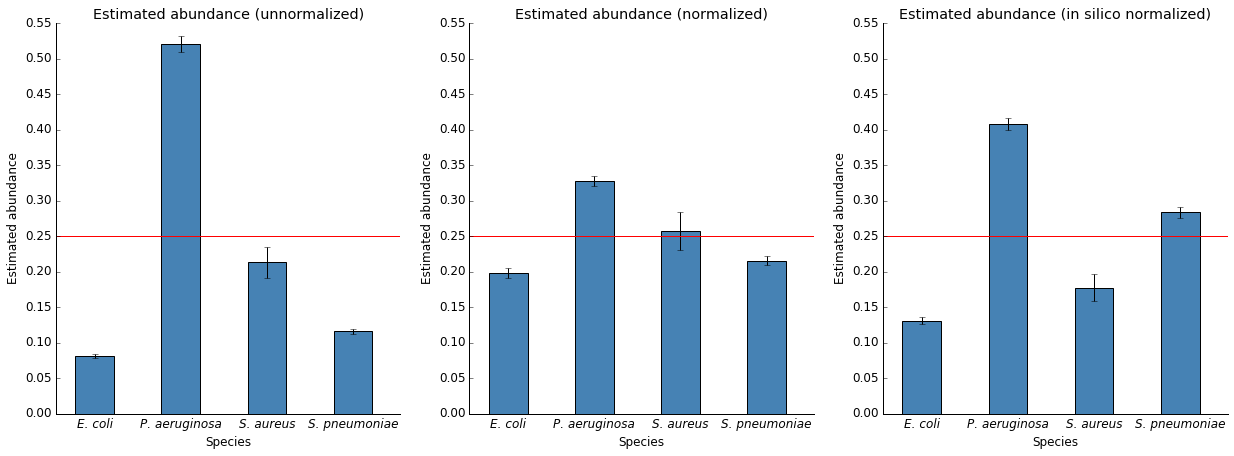

In [63]:
# Adjust bar plot settings
font = {"family": "sans",
        "weight": "normal",
        "size": 12}
mpl.rc("font", **font)
indices = np.arange(0, len(mix_names))
width = 0.45

# Create plot figure with three  subplots axes
fig_mix, (ax_mix1, ax_mix2, ax_mix3) = plt.subplots(1, 3) #, sharey=True)

# First plot with raw unmodified abundance estimations
rects_mix1 = ax_mix1.bar(indices, 
                         mix_means, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems, 
                         error_kw=dict(ecolor="black"))
ax_mix1.spines["top"].set_color("none")
ax_mix1.spines["right"].set_color("none")
ax_mix1.xaxis.set_ticks_position("none")
ax_mix1.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix1.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix1.set_ylim([0, 0.55])
ax_mix1.set_xlabel("Species")
ax_mix1.set_ylabel("Estimated abundance")
ax_mix1.set_title("Estimated abundance (unnormalized)")
ax_mix1.set_xticks(indices + width/2)
ax_mix1.set_xticklabels(mix_names, style="italic")
ax_mix1.set_yticks(np.arange(0, 0.56, 0.05))
# Place expected ratio line
ax_mix1.plot([-.5,4], [0.25,0.25], color="r")

# Second plot with corrected and normalized estimated abundances
rects_mix2 = ax_mix2.bar(indices, 
                         mix_means_corrected_normalized, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized,  
                         error_kw=dict(ecolor="black"))
ax_mix2.spines["top"].set_color("none")
ax_mix2.spines["right"].set_color("none")
ax_mix2.xaxis.set_ticks_position("none")
ax_mix2.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix2.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix2.set_ylim([0, 0.55])
ax_mix2.set_xlabel("Species")
ax_mix2.set_ylabel("Estimated abundance")
ax_mix2.set_title("Estimated abundance (normalized)")
ax_mix2.set_xticks(indices + width/2)
ax_mix2.set_xticklabels(mix_names, style="italic")
ax_mix2.set_yticks(np.arange(0, 0.56, 0.05))
# Place expected ratio line
ax_mix2.plot([-.5,4], [0.25,0.25], color="r")

# Third plot with in silico corrected and normalized estimated abundances
rects_mix3 = ax_mix3.bar(indices, 
                         mix_means_corrected_normalized_insilico, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized_insilico,  
                         error_kw=dict(ecolor="black"))
ax_mix3.spines["top"].set_color("none")
ax_mix3.spines["right"].set_color("none")
ax_mix3.xaxis.set_ticks_position("none")
ax_mix3.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix3.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix3.set_ylim([0, 0.55])
ax_mix3.set_xlabel("Species")
ax_mix3.set_ylabel("Estimated abundance")
ax_mix3.set_title("Estimated abundance (in silico normalized)")
ax_mix3.set_xticks(indices + width/2)
ax_mix3.set_xticklabels(mix_names, style="italic")
ax_mix3.set_yticks(np.arange(0, 0.56, 0.05))
# Place expected ratio line
ax_mix3.plot([-.5,4], [0.25,0.25], color="r")

# Adjust figure size, save figures
fig_mix.set_figheight(7)
fig_mix.set_figwidth(21)
plt.savefig("real_cultures_mix_tpr_insilico.png")
plt.savefig("real_cultures_mix_tpr_insilico.pdf")

In [64]:
# Print a table of all the relevant abundances, raw, and normalized, and in silico corrected and normalized
print(mix_data[["Species", "Estimated abundance", "Corrected abundance", "Insilico corrected abundance"]])

          Species Estimated abundance  Corrected abundance  Insilico corrected abundance
0         E. coli           0.0863787             2.312550                      0.319448
1         E. coli           0.0767196             2.053953                      0.283726
2         E. coli           0.0807292             2.161298                      0.298555
3   P. aeruginosa            0.538206             3.718075                      0.966085
4   P. aeruginosa             0.52381             3.618620                      0.940243
5   P. aeruginosa                 0.5             3.454137                      0.897505
6       S. aureus            0.169435             2.243043                      0.324154
7       S. aureus            0.227513             3.011900                      0.435265
8       S. aureus            0.242188             3.206163                      0.463339
9   S. pneumoniae            0.122924             2.494185                      0.687492
10  S. pneumoniae    